[[35  7]
 [ 7 65]]
Accuracy Score: 87.71929824561403
Precision Score: 90.27777777777779
Recall Score: 90.27777777777779
F1 Score: 90.27777777777779


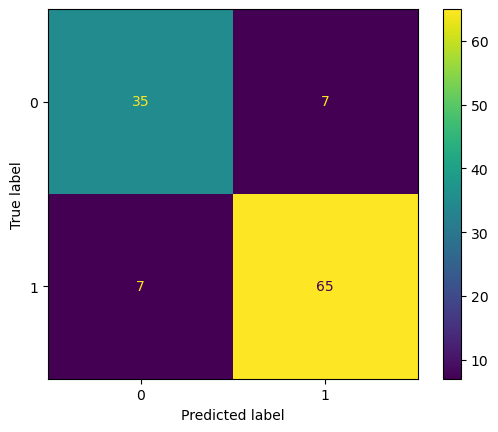

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Breast_cancer_data.csv")

#training and testing data
from sklearn.model_selection import train_test_split
X = df.drop("diagnosis", axis=1)
y = df.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=21)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

#model implementation(DT Model)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    dt, X_test, y_test, cmap='viridis')

#calculating f1_score, recall_score, accuracy_score, precision_score
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
rmacc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ' + str(rmacc*100))
print('Precision Score: ' + str(precision_score(y_test, y_pred)*100))
print('Recall Score: ' + str(recall_score(y_test, y_pred)*100))
print('F1 Score: ' + str(f1_score(y_test, y_pred)*100))
